## MACHINE LEARNING ASSIGNMENT 3- ANUSHRI JAIN(101903678)

### Part I: Based on Feature Selection, Cleaning, and Preprocessing to Construct an Input from Data Source

In [1]:
!pip install kaggle
import kaggle

In [2]:
!kaggle datasets download -d jahias/microsoft-adventure-works-cycles-customer-data

microsoft-adventure-works-cycles-customer-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
from zipfile import ZipFile
file_name = 'microsoft-adventure-works-cycles-customer-data.zip' #the file is your dataset exact name
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [4]:
import numpy as np
import pandas as pd
df1 = pd.read_csv('AWCustomers.csv')
df2 = pd.read_csv("AWSales.csv")
df = pd.merge(df1, df2, on='CustomerID')

In [5]:
df.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,LastUpdated,BikeBuyer,AvgMonthSpend
0,21173,NaN,Chad,C,Yuan,NaN,7090 C. Mount Hood,NaN,Wollongong,New South Wales,...,M,M,1,3,0,1,81916,2017-03-06,1,50.97
1,13249,NaN,Ryan,NaN,Perry,NaN,3651 Willow Lake Rd,NaN,Shawnee,British Columbia,...,M,M,1,2,1,2,81076,2017-03-06,1,53.11
2,29350,NaN,Julia,NaN,Thompson,NaN,1774 Tice Valley Blvd.,NaN,West Covina,California,...,F,S,0,3,0,0,86387,2017-03-06,1,54.08
3,13503,NaN,Theodore,NaN,Gomez,NaN,2103 Baldwin Dr,NaN,Liverpool,England,...,M,M,1,2,1,2,61481,2017-03-06,1,56.93
4,22803,NaN,Marshall,J,Shan,NaN,Am Gallberg 234,NaN,Werne,Nordrhein-Westfalen,...,M,S,1,1,0,0,51804,2017-03-06,1,55.41


In [6]:
for col in df.columns:
    print(col)

CustomerID
Title
FirstName
MiddleName
LastName
Suffix
AddressLine1
AddressLine2
City
StateProvinceName
CountryRegionName
PostalCode
PhoneNumber
BirthDate
Education
Occupation
Gender
MaritalStatus
HomeOwnerFlag
NumberCarsOwned
NumberChildrenAtHome
TotalChildren
YearlyIncome
LastUpdated
BikeBuyer
AvgMonthSpend


In [7]:
#dropped all unnecessary columns
new_df = df.drop(labels =['CustomerID','BirthDate','Title','LastUpdated','FirstName','MiddleName','LastName','Suffix','AddressLine1','AddressLine2','City','StateProvinceName','CountryRegionName','PostalCode','PhoneNumber'],axis=1)
new_df.head()

,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,AvgMonthSpend
0,Bachelors,Clerical,M,M,1,3,0,1,81916,1,50.97
1,Partial College,Clerical,M,M,1,2,1,2,81076,1,53.11
2,Bachelors,Clerical,F,S,0,3,0,0,86387,1,54.08
3,Partial College,Skilled Manual,M,M,1,2,1,2,61481,1,56.93
4,Partial College,Skilled Manual,M,S,1,1,0,0,51804,1,55.41


In [8]:
new_df.dtypes

Education                object
Occupation               object
Gender                   object
MaritalStatus            object
HomeOwnerFlag             int64
NumberCarsOwned           int64
NumberChildrenAtHome      int64
TotalChildren             int64
YearlyIncome              int64
BikeBuyer                 int64
AvgMonthSpend           float64
dtype: object

<b>PART 1 C)<br>
Determining the data types<br>
HomeOwnerFlag --> Nominal<br>
Gender --> Nominal<br>
HomeOwnerStatus --> Nominal<br>
MaritalStatus --> Nominal<br>
NumberChildrenAtHome --> Ordinal<br>
YearlyIncome --> Continous<br></b>

### Part II: Data Preprocessing and Transformation

##### Handling Null values

In [9]:
#checks null values - True means there is null value
print(pd.isna(new_df))

       Education  Occupation  Gender  MaritalStatus  HomeOwnerFlag  \
0          False       False   False          False          False   
1          False       False   False          False          False   
2          False       False   False          False          False   
3          False       False   False          False          False   
4          False       False   False          False          False   
...          ...         ...     ...            ...            ...   
18356      False       False   False          False          False   
18357      False       False   False          False          False   
18358      False       False   False          False          False   
18359      False       False   False          False          False   
18360      False       False   False          False          False   

       NumberCarsOwned  NumberChildrenAtHome  TotalChildren  YearlyIncome  \
0                False                 False          False         False   
1    

In [10]:
new_df.isnull().sum()
#zero nulls in data set

Education               0
Occupation              0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
BikeBuyer               0
AvgMonthSpend           0
dtype: int64

In [11]:
new_df.describe()

,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,AvgMonthSpend
count,18361.000000,18361.000000,18361.000000,18361.000000,18361.000000,18361.000000,18361.000000
mean,0.610588,1.270301,0.338162,0.850389,72754.779642,0.551767,51.766744
std,0.487630,0.913989,0.568957,0.927315,30686.014313,0.497326,3.437684
min,0.000000,0.000000,0.000000,0.000000,25435.000000,0.000000,44.100000
25%,0.000000,1.000000,0.000000,0.000000,53312.000000,0.000000,49.410000
50%,1.000000,1.000000,0.000000,0.000000,61851.000000,1.000000,51.420000
75%,1.000000,2.000000,1.000000,2.000000,87410.000000,1.000000,53.590000
max,1.000000,5.000000,3.000000,3.000000,139115.000000,1.000000,65.290000


##### Normalization

In [12]:
new_df.head()

,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,AvgMonthSpend
0,Bachelors,Clerical,M,M,1,3,0,1,81916,1,50.97
1,Partial College,Clerical,M,M,1,2,1,2,81076,1,53.11
2,Bachelors,Clerical,F,S,0,3,0,0,86387,1,54.08
3,Partial College,Skilled Manual,M,M,1,2,1,2,61481,1,56.93
4,Partial College,Skilled Manual,M,S,1,1,0,0,51804,1,55.41


In [13]:
new_df['YearlyIncome'] = (new_df['YearlyIncome'] - new_df['YearlyIncome'].min()) / (new_df['YearlyIncome'].max() - new_df['YearlyIncome'].min())

In [14]:
new_df['TotalChildren'] = (new_df['TotalChildren'] - new_df['TotalChildren'].min()) / (new_df['TotalChildren'].max() - new_df['TotalChildren'].min())

In [15]:
new_df['NumberCarsOwned'] = (new_df['NumberCarsOwned'] - new_df['NumberCarsOwned'].min()) / (new_df['NumberCarsOwned'].max() - new_df['NumberCarsOwned'].min())

In [16]:
new_df['NumberChildrenAtHome'] = (new_df['NumberChildrenAtHome'] - new_df['NumberChildrenAtHome'].min()) / (new_df['NumberChildrenAtHome'].max() - new_df['NumberChildrenAtHome'].min())

In [17]:
len(new_df['HomeOwnerFlag'].unique())

2

In [18]:
new_df

,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,AvgMonthSpend
0,Bachelors,Clerical,M,M,1,0.6,0.000000,0.333333,0.496842,1,50.97
1,Partial College,Clerical,M,M,1,0.4,0.333333,0.666667,0.489453,1,53.11
2,Bachelors,Clerical,F,S,0,0.6,0.000000,0.000000,0.536172,1,54.08
3,Partial College,Skilled Manual,M,M,1,0.4,0.333333,0.666667,0.317083,1,56.93
4,Partial College,Skilled Manual,M,S,1,0.2,0.000000,0.000000,0.231958,1,55.41
...,...,...,...,...,...,...,...,...,...,...,...
18356,Graduate Degree,Skilled Manual,F,M,0,0.2,0.000000,0.666667,0.242065,0,48.14
18357,Bachelors,Skilled Manual,F,S,0,0.4,0.000000,0.000000,0.312781,1,50.23
18358,Partial College,Skilled Manual,F,S,0,0.4,0.000000,0.000000,0.232442,1,49.56
18359,High School,Clerical,F,S,0,0.0,0.000000,0.000000,0.543121,0,51.42


##### Binning

In [19]:
len(new_df['Education'].unique())

5

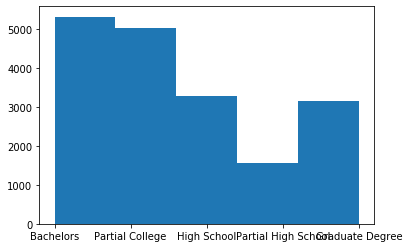

In [20]:
import matplotlib.pyplot as plt

edu = new_df['Education']
plt.hist(edu,bins=5)
plt.show()

In [21]:
#binning with respect to number of children at home
bins = np.linspace(min(new_df['NumberChildrenAtHome']), max(new_df['NumberChildrenAtHome']),4)
labels = ['less', 'medium', 'more']
new_df['bins'] = pd.cut(df['NumberChildrenAtHome'], bins=bins, labels=labels, include_lowest=True)

In [22]:
new_df.bins

0        less
1        more
2        less
3        more
4        less
         ... 
18356    less
18357    less
18358    less
18359    less
18360    less
Name: bins, Length: 18361, dtype: category
Categories (3, object): [less < medium < more]

['Clerical' 'Skilled Manual' 'Manual' 'Management' 'Professional']


(array([4464., 6059., 3377., 2858., 1603.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <a list of 5 Patch objects>)

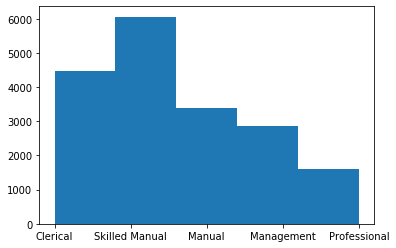

In [23]:
#binning with respect to occupation
print(new_df['Occupation'].unique())
plt.hist(new_df['Occupation'],bins = 5)

In [24]:
new_df.NumberChildrenAtHome.value_counts()

0.000000    13038
0.333333     4468
0.666667      824
1.000000       31
Name: NumberChildrenAtHome, dtype: int64

### Part lll - Calculating Proximity/Correlation Analysis of two features.

In [25]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return float(len(s1.intersection(s2)) / len(s1.union(s2)))
jaccard_similarity(new_df.YearlyIncome, new_df.BikeBuyer)

0.00013024225058609013

In [26]:
from scipy.spatial.distance import cosine
print(1 - cosine(df["YearlyIncome"], df["BikeBuyer"]))

0.7493294809313981


In [27]:
r = np.corrcoef(df.YearlyIncome, df.BikeBuyer)
r

array([[1.        , 0.24945696],
       [0.24945696, 1.        ]])